In [57]:
#Importar librerias necesarias 
import numpy as np
import pandas as pd

In [117]:
df = pd.read_csv('Spam_SMS_Collection.csv',sep='\t', names=['label','message'], engine='python',encoding='utf8',quoting=3)

In [118]:
df.shape

(5574, 2)

In [119]:
df.columns

Index(['label', 'message'], dtype='object')

In [120]:
df.dtypes

label      object
message    object
dtype: object

In [121]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [122]:
df.tail()

,label,message
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5574 non-null   object
 1   message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [124]:
df.describe(include='object')

,label,message
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [125]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [126]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [127]:
df.tail()

,label,message
5569,1,This is the 2nd time we have tried 2 contact u...
5570,0,Will ü b going to esplanade fr home?
5571,0,"Pity, * was in mood for that. So...any other s..."
5572,0,The guy did some bitching but I acted like i'd...
5573,0,Rofl. Its true to its name


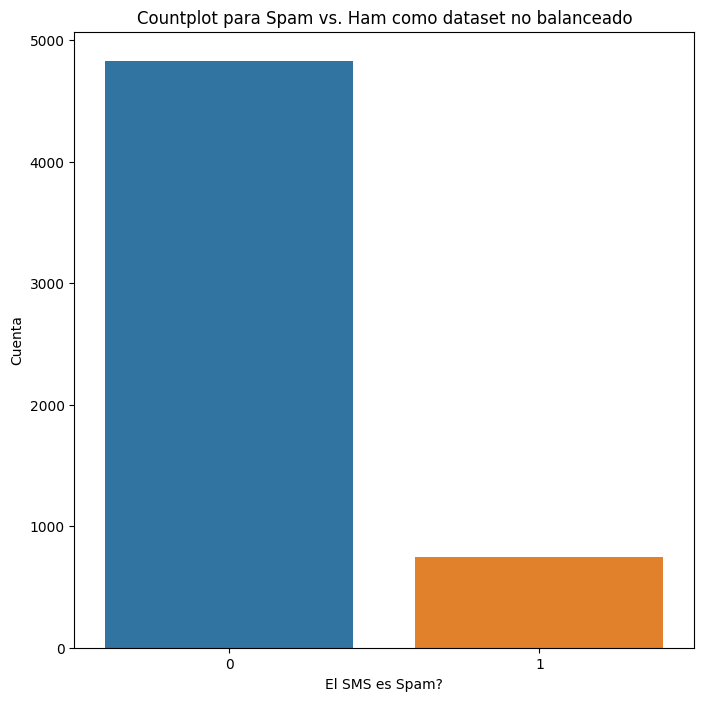

In [128]:
# Importar librerias esenciales para la visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot para Spam vs. Ham como dataset no balanceado')
p = plt.xlabel('El SMS es Spam?')
p = plt.ylabel('Cuenta')

**Insight:** Por la gráfica podemos ver que el dataset no está nada balanceado

## Feature Engineering 

<ul> 
    <li> Tratamiento de conjuntos de datos desequilibrados mediante sobremuestreo </li>
    <li> Crear nuevas funciones, por ejemplo, word_count, contains_currency_symbol, contains_numbers, etc. </li>
</ul>

In [129]:
only_spam = df[df['label']==1]
print('Numero de Spam records: {}'.format(only_spam.shape[0]))
print('Numero de Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Numero de Spam records: 747
Numero de Ham records: 4827


In [130]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
    df = pd.concat([df, only_spam])

df.shape

(9309, 2)

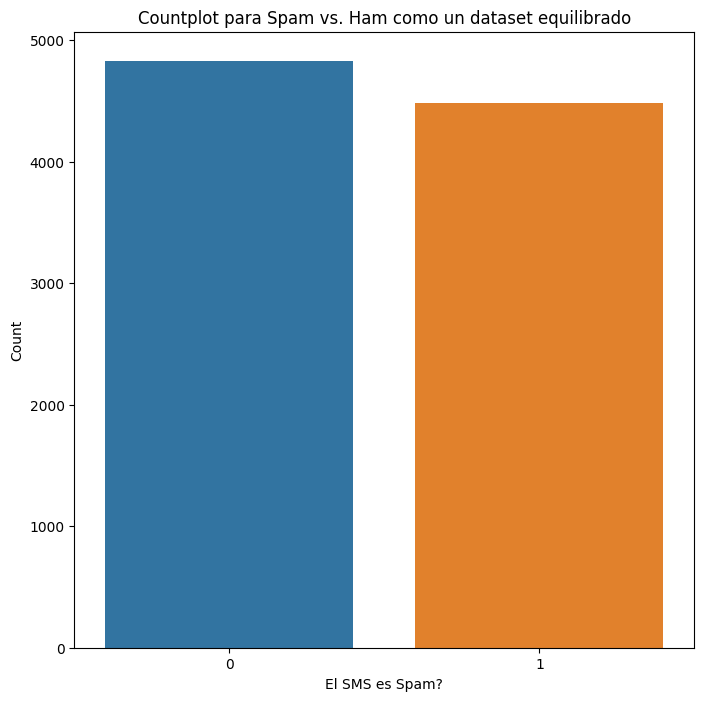

In [131]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot para Spam vs. Ham como un dataset equilibrado')
p = plt.xlabel('El SMS es Spam?')
p = plt.ylabel('Count')

In [132]:
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [133]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


/tmp/ipykernel_12579/1820540704.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label']==0].word_count)
/tmp/ipykernel_12579/1820540704.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label']==1].word_count, color='red')


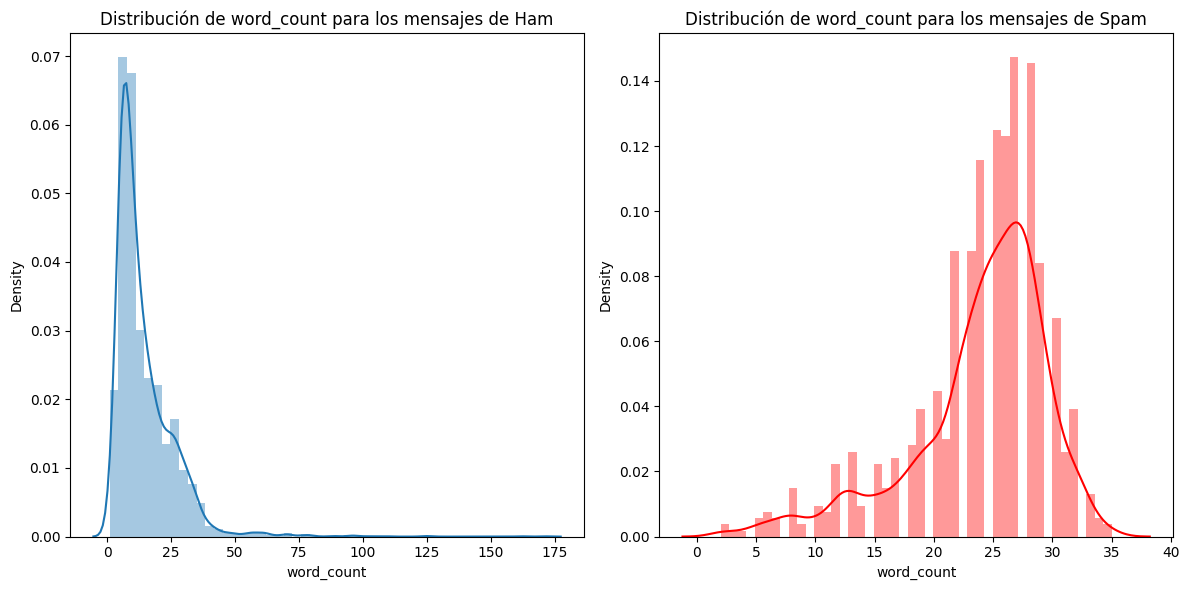

In [134]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribución de word_count para los mensajes de Ham')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribución de word_count para los mensajes de Spam')

plt.tight_layout()
plt.show()

**Insight**: El recuento de palabras de los mensajes de spam se sitúa en el rango de 15 a 30 palabras, mientras que la mayoría de los mensajes de jamón se sitúan en el rango de menos de **25 palabras.**

In [135]:
# Crear feature contains_currency_symbol
def currency(x):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
        if i in x:
            return 1
        return 0

df['contains_currency_symbol'] = df['message'].apply(currency)

In [136]:
df.tail()

,label,message,word_count,contains_currency_symbol
5539,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5542,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0
5549,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5568,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5569,1,This is the 2nd time we have tried 2 contact u...,30,0


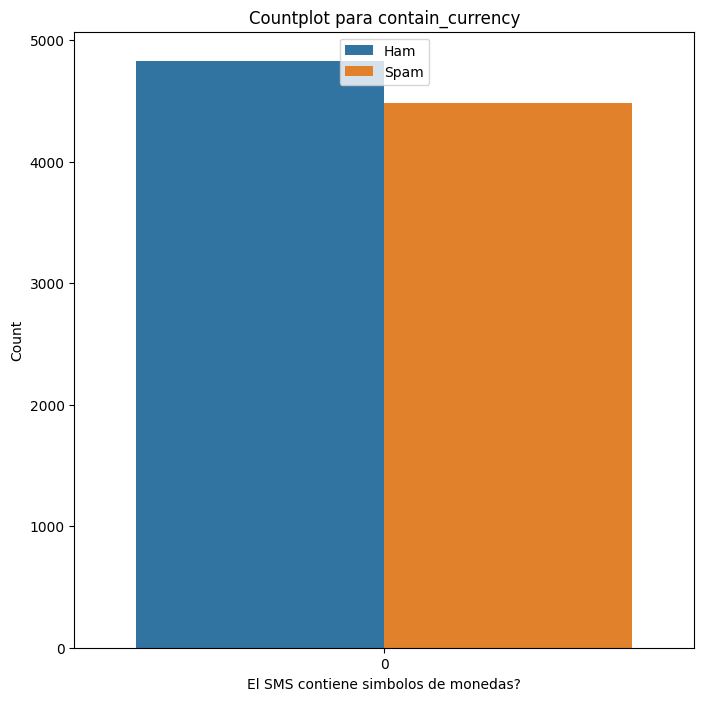

In [137]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
p = plt.title('Countplot para contain_currency')
p = plt.xlabel('El SMS contiene simbolos de monedas?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

In [138]:
def numbers(x):
    for i in x:
        if ord(i)>=48 and ord(i)<=57:
            return 1
        return 0

df['contains_number'] = df['message'].apply(numbers)

In [139]:
df.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,0
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


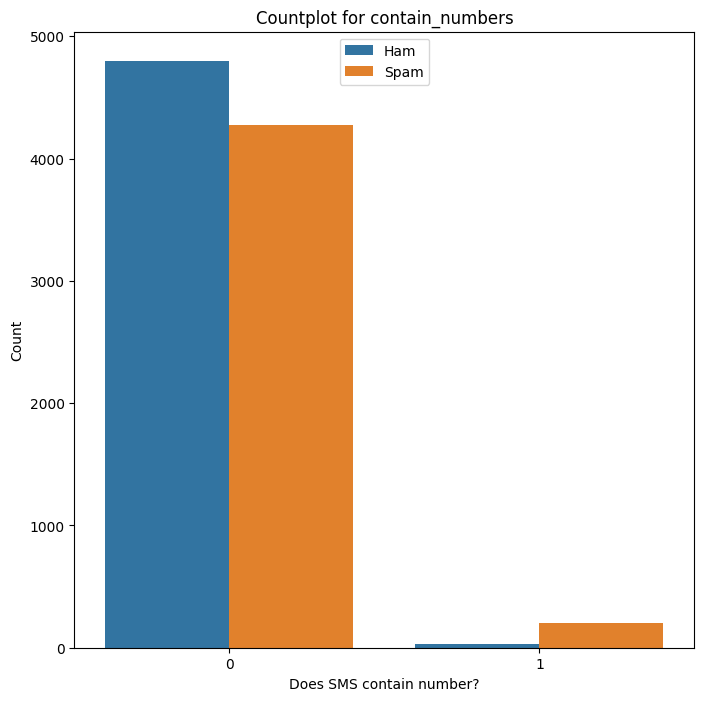

In [140]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)